In [2]:
from pandas import read_csv, DataFrame
from sklearn.preprocessing import StandardScaler

# Lade den Datensatz
data: DataFrame = read_csv("class_ny_arrests_cleaned_outliers.csv")

# Liste der Spalten, die skaliert werden sollen
columns_to_scale = ["PD_CD", "KY_CD", "ARREST_PRECINCT", "JURISDICTION_CODE", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude"]
# StandardScaler initialisieren und nur auf die ausgewählten Spalten anwenden
transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(data[columns_to_scale])
scaled_values = transf.transform(data[columns_to_scale])

# Skalierten DataFrame erstellen und die nicht-skalierbaren Spalten hinzufügen
df_scaled = data.copy()
df_scaled[columns_to_scale] = scaled_values

# Exportiere den DataFrame mit den skalierten Spalten
df_scaled.to_csv("class_ny_arrests_truncate_outliers_scaling.csv", index=False)

# Ausgabe zur Überprüfung
print("Skalierung abgeschlossen. Exportierte Datei mit skalierten Werten.")


Skalierung abgeschlossen. Exportierte Datei mit skalierten Werten.


In [3]:
from pandas import read_csv, DataFrame
from sklearn.preprocessing import MinMaxScaler

# Lade den Datensatz
data: DataFrame = read_csv("class_ny_arrests_cleaned_outliers.csv", na_values="")

# Liste der Spalten, die skaliert werden sollen
columns_to_scale = ["PD_CD", "KY_CD", "ARREST_PRECINCT", "JURISDICTION_CODE", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude"]


# MinMaxScaler initialisieren und nur auf die ausgewählten Spalten anwenden
transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(data[columns_to_scale])
scaled_values = transf.transform(data[columns_to_scale])

# Skalierten DataFrame erstellen und die nicht-skalierbaren Spalten hinzufügen
df_scaled = data.copy()
df_scaled[columns_to_scale] = scaled_values

# Exportiere den DataFrame mit den skalierten Spalten
df_scaled.to_csv("class_ny_arrests_truncate_outliers_scaled_minmax.csv", index=False)

# Ausgabe zur Überprüfung
print("MinMax-Skalierung abgeschlossen. Exportierte Datei mit skalierten Werten.")


MinMax-Skalierung abgeschlossen. Exportierte Datei mit skalierten Werten.


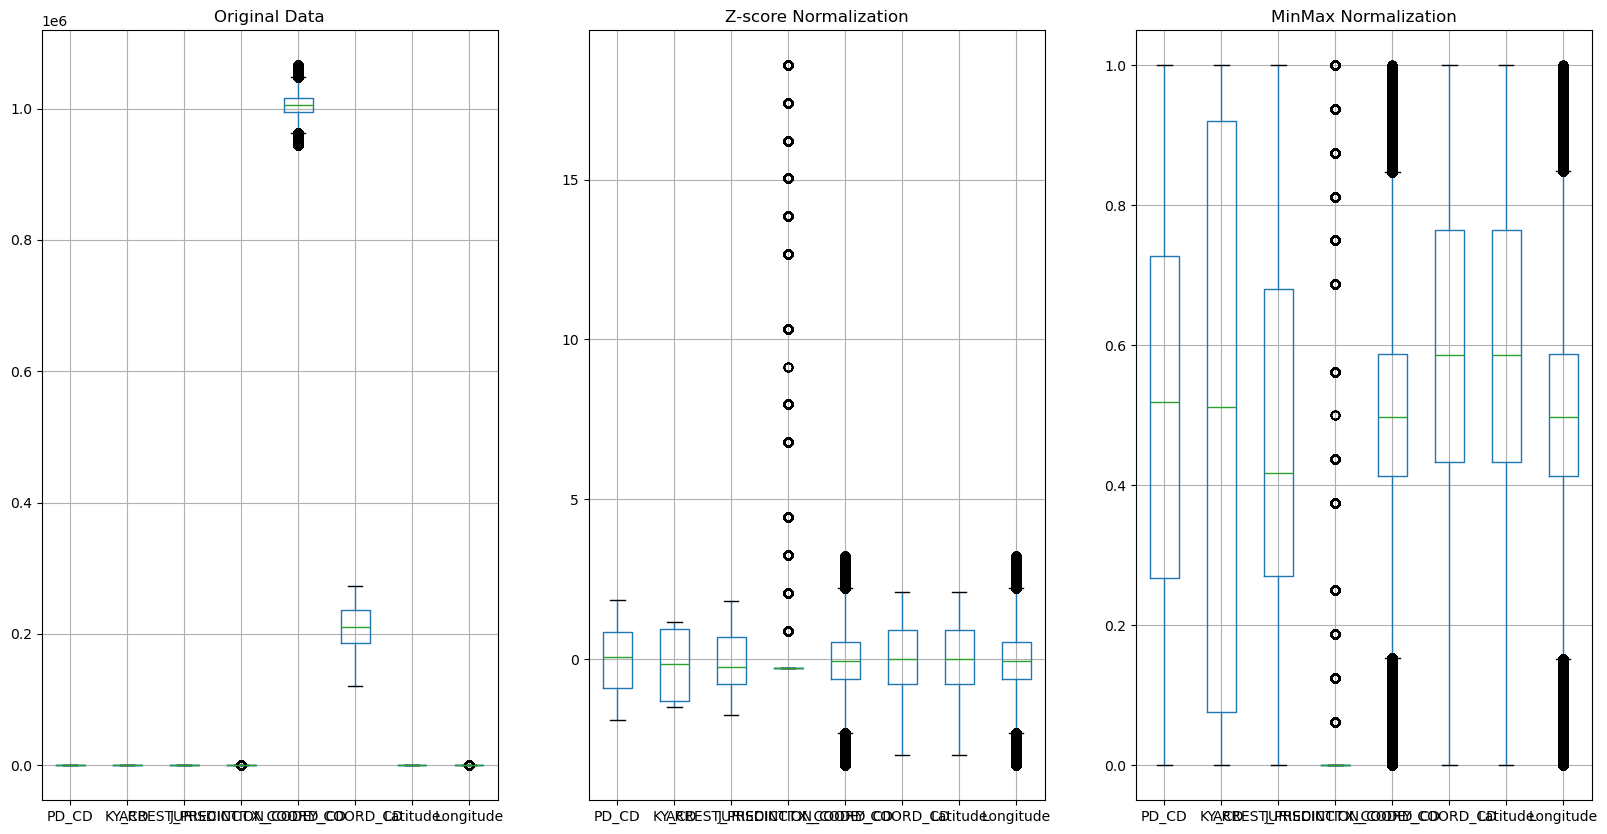

In [4]:
from pandas import read_csv, DataFrame
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from matplotlib.pyplot import subplots, show

# Lade den ursprünglichen Datensatz
data: DataFrame = read_csv("class_ny_arrests_cleaned_outliers.csv", na_values="")

# Liste der Spalten, die skaliert werden sollen
columns_to_scale = ["PD_CD", "KY_CD", "ARREST_PRECINCT", "JURISDICTION_CODE", "X_COORD_CD", "Y_COORD_CD", "Latitude", "Longitude"]

# Z-Score Normalization
transf_zscore: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(data[columns_to_scale])
zscore_values = transf_zscore.transform(data[columns_to_scale])

# Erstelle skalierten DataFrame für Z-Score
df_zscore = data.copy()
df_zscore[columns_to_scale] = zscore_values

# Min-Max Normalization
transf_minmax: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(data[columns_to_scale])
minmax_values = transf_minmax.transform(data[columns_to_scale])

# Erstelle skalierten DataFrame für Min-Max
df_minmax = data.copy()
df_minmax[columns_to_scale] = minmax_values

# Plotting
fig, axs = subplots(1, 3, figsize=(20, 10), squeeze=False)

# Original Data
axs[0, 0].set_title("Original Data")
data[columns_to_scale].boxplot(ax=axs[0, 0])

# Z-Score Normalized Data
axs[0, 1].set_title("Z-score Normalization")
df_zscore[columns_to_scale].boxplot(ax=axs[0, 1])

# Min-Max Normalized Data
axs[0, 2].set_title("MinMax Normalization")
df_minmax[columns_to_scale].boxplot(ax=axs[0, 2])

show()
